<a href="https://colab.research.google.com/github/AhmedAbdoulahi/DataScience/blob/master/Atelier3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Lecture des données
df = pd.read_csv('CC GENERAL.csv')
print(df.shape)
df.head()

(8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.drop_duplicates(inplace=True)
print("Dimensions après suppression des doublons : ", df.shape)
df.head()

Dimensions après suppression des doublons :  (8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
# remplacer les valeurs nulls par la moyenne
df.fillna(df.mean(), inplace = True)

In [ ]:
#Identifier et exclure les outliers
""" moy = df.mean()
etype = df.std()
limite_sup = moy + 3 * etype
limite_inf = moy - 3 * etype
df = df[(df > limite_sup) | (df < limite_inf)].stack()"""

' moy = df.mean()\netype = df.std()\nlimite_sup = moy + 3 * etype\nlimite_inf = moy - 3 * etype\ndf = df[(df > limite_sup) | (df < limite_inf)].stack()'

In [ ]:
#supprimer les lignes qui contiennent des valeurs aberrantes (ou outliers) dans l'index de niveau 0
#df = df.drop(outliers.index.get_level_values(0))


<AxesSubplot:>

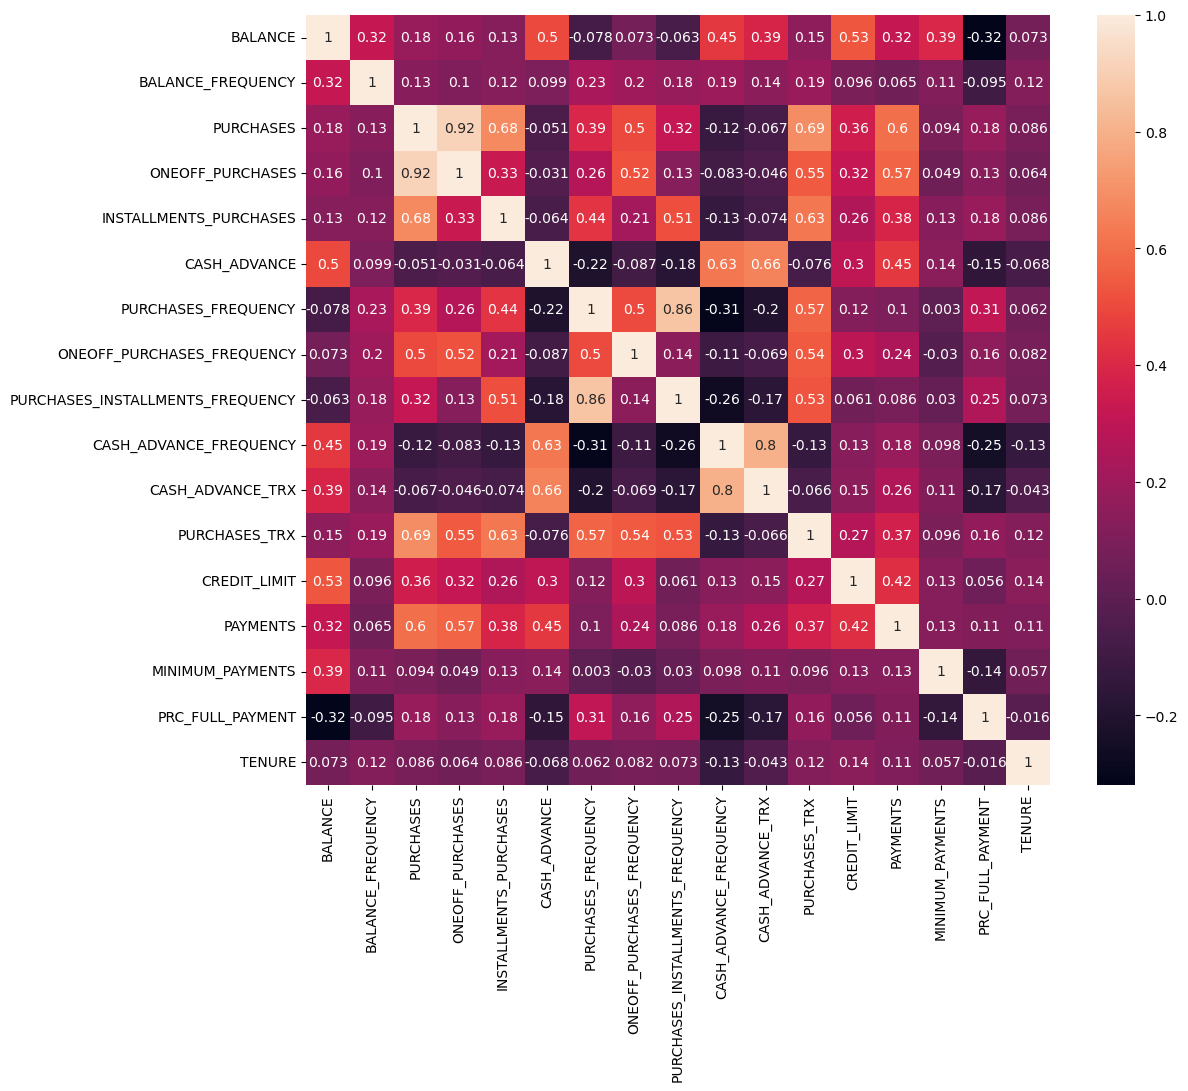

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True)

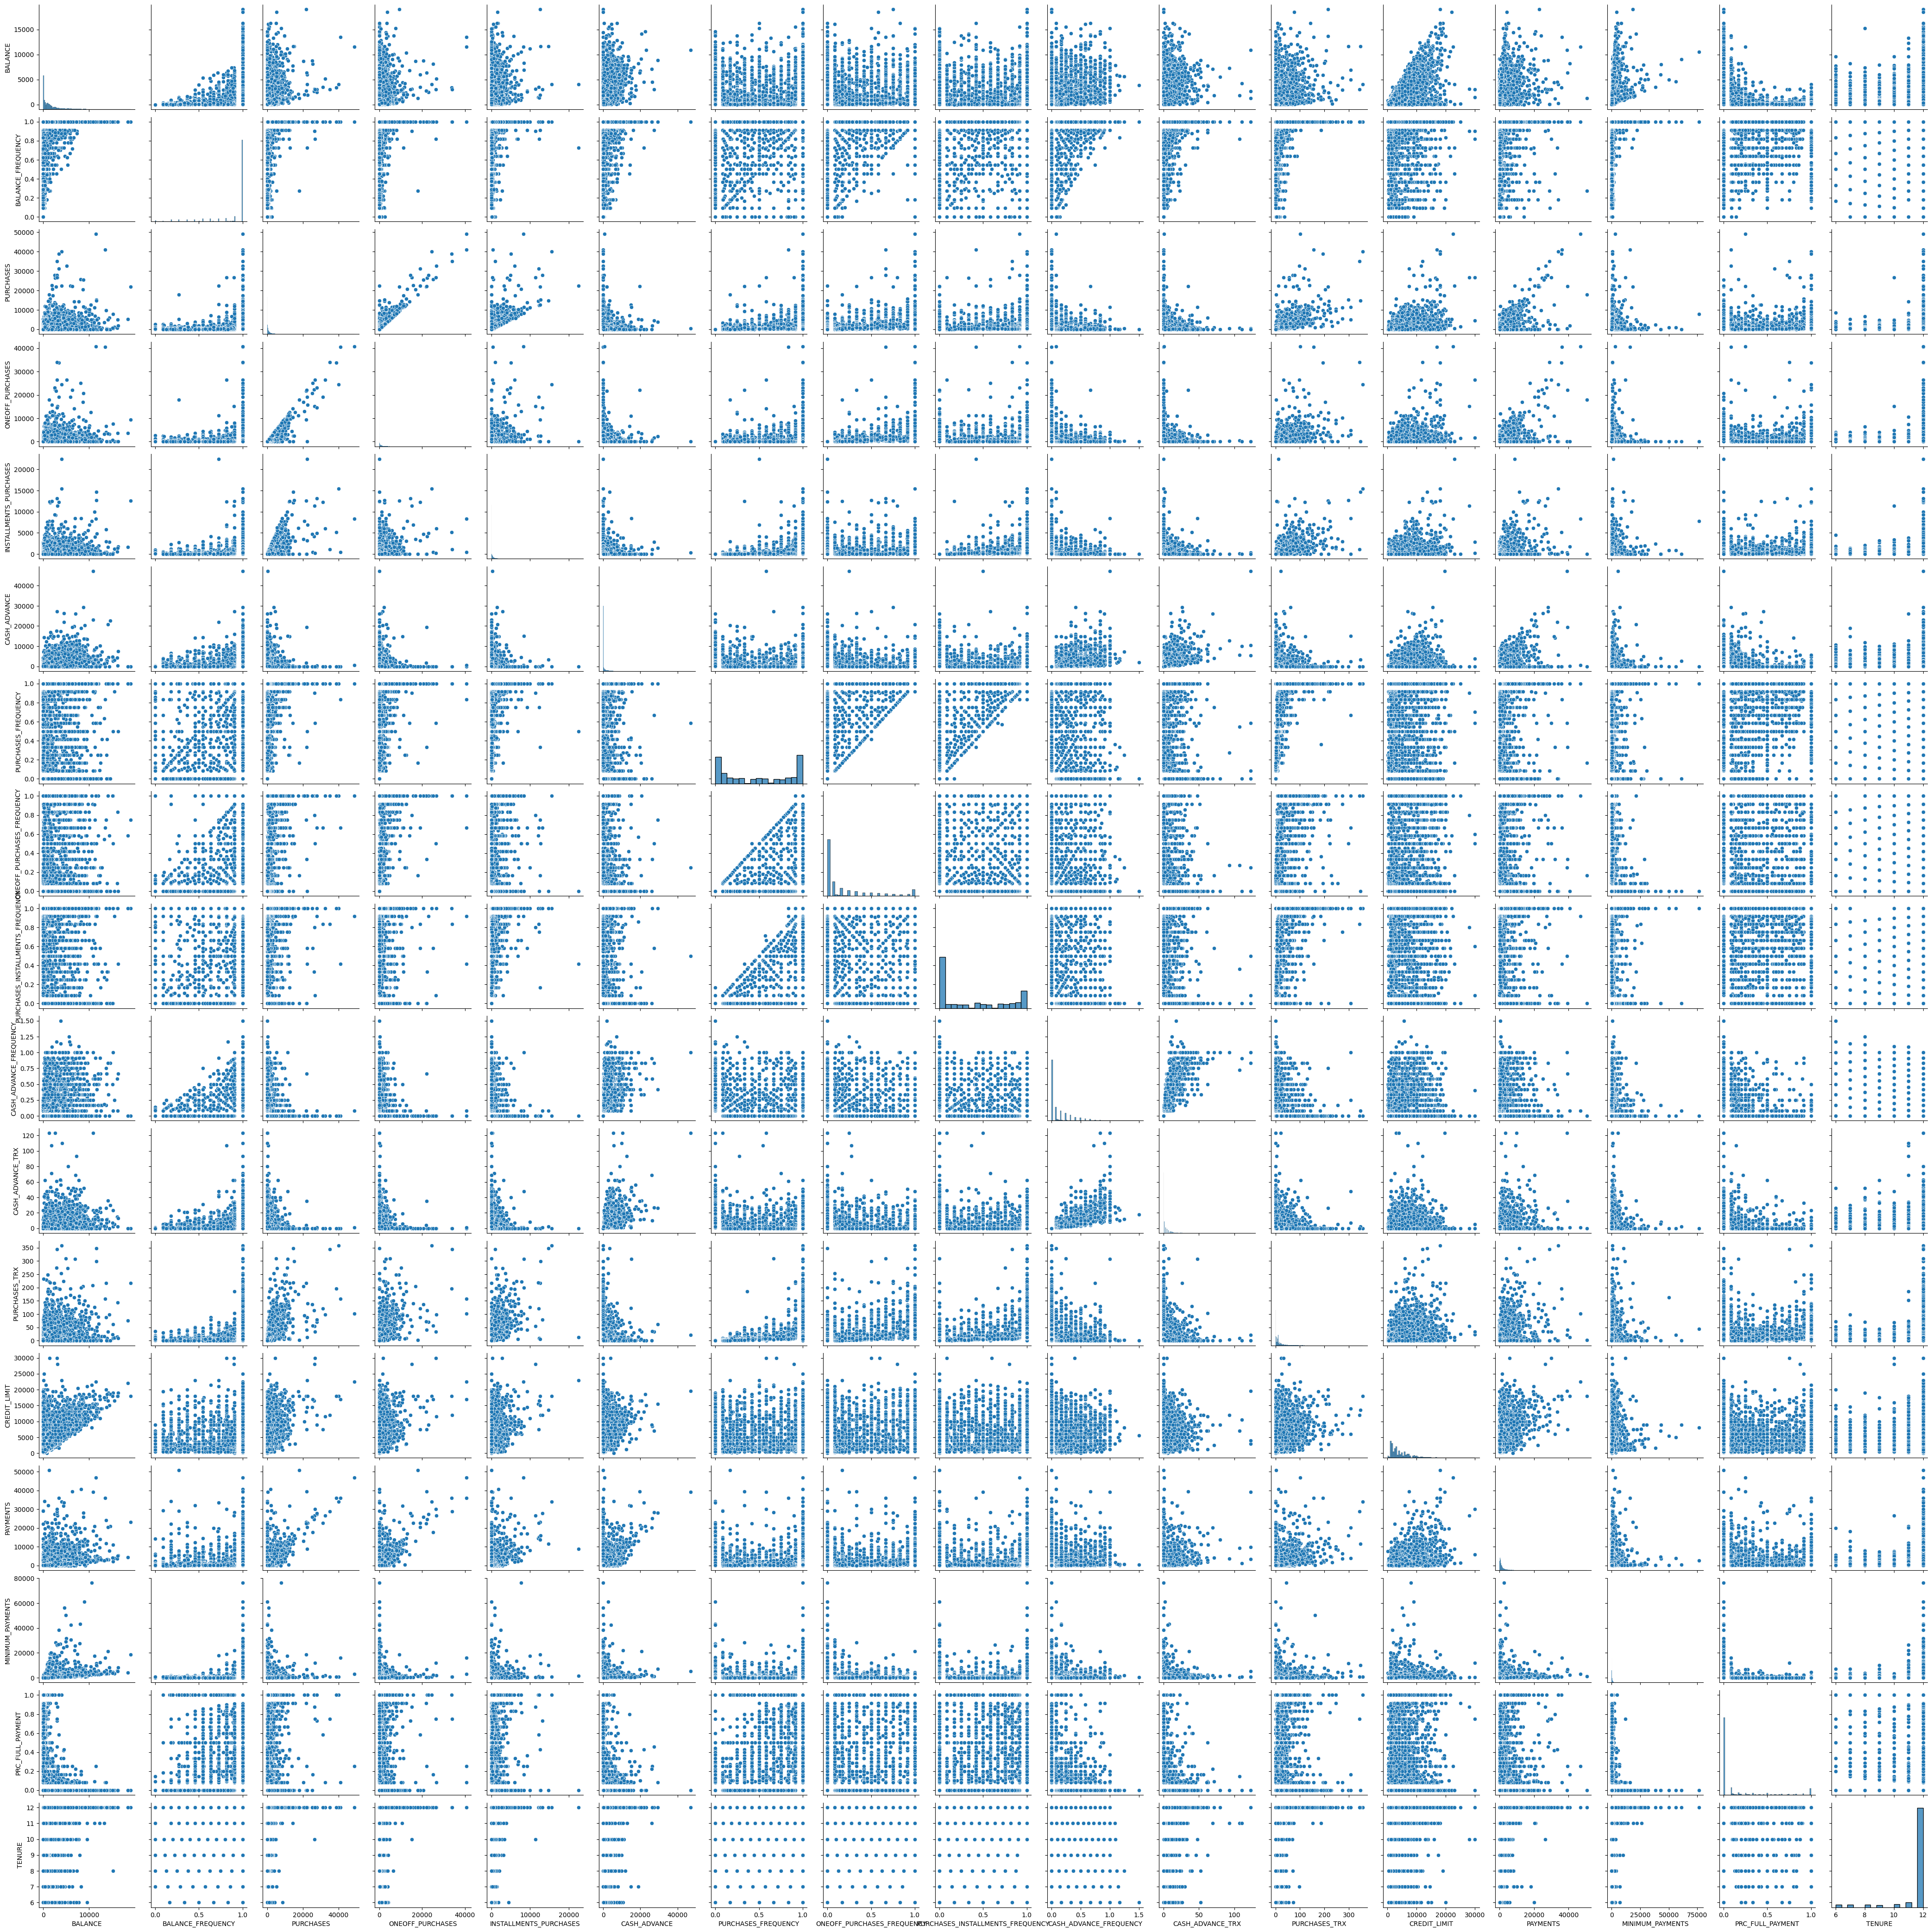

In [ ]:

sns.pairplot(df)


# 1.construire le modèle de clustering en utilisant sklearn et l'algorithme Kmean

In [ ]:
X = df.iloc[:,[2,3]].values
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

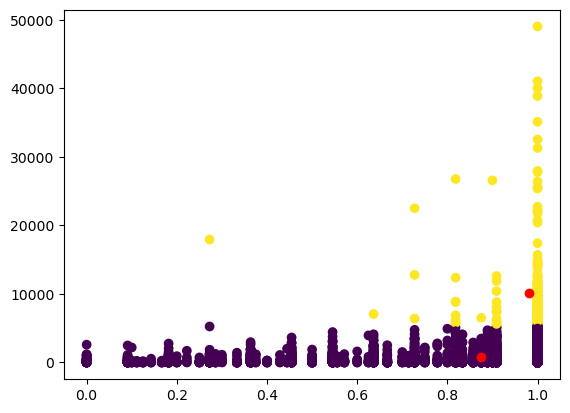

In [ ]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

# 2.Cherchons le K avec la méthode de Elbow

Text(0, 0.5, 'Cout du modele (Inertia)')

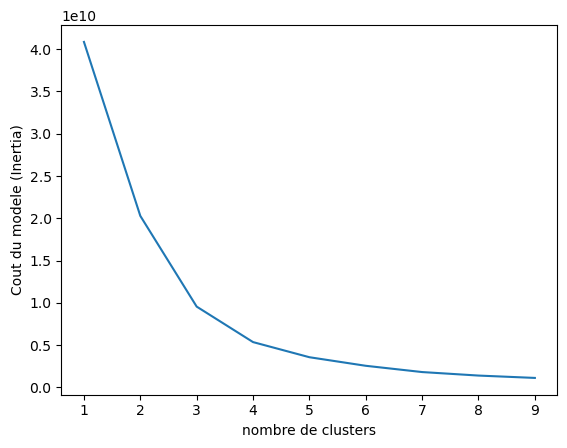

In [ ]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

La méthode de Elbow nous permet de dire que la meilleure valeur de K est : 4 neanmoins 5 et 3 marchent aussi

In [ ]:
# suppressions non importantes : ( BALANCE_FREQUENCY	 donne la même information que Balance)
df.drop(['CUST_ID','BALANCE'], axis=1, inplace = True)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
X=df.values
df.head(10)


BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.818182      95.40              0.00                   95.40   
1           0.909091       0.00              0.00                    0.00   
2           1.000000     773.17            773.17                    0.00   
3           0.636364    1499.00           1499.00                    0.00   
4           1.000000      16.00             16.00                    0.00   
5           1.000000    1333.28              0.00                 1333.28   
6           1.000000    7091.01           6402.63                  688.38   
7           1.000000     436.20              0.00                  436.20   
8           1.000000     861.49            661.49                  200.00   
9           0.545455    1281.60           1281.60                    0.00   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
3    205.788017             0.083333                    0.083333   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   
6      0.000000             1.000000                    1.000000   
7      0.000000             1.000000                    0.000000   
8      0.000000             0.333333                    0.083333   
9      0.000000             0.166667                    0.166667   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                0.000000                 0   
1                          0.000000                0.250000                 4   
2                          0.000000                0.000000                 0   
3                          0.000000                0.083333                 1   
4                          0.000000                0.000000                 0   
5                          0.583333                0.000000                 0   
6                          1.000000                0.000000                 0   
7                          1.000000                0.000000                 0   
8                          0.250000                0.000000                 0   
9                          0.000000                0.000000                 0   

   PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0              2        1000.0   201.802084        139.509787   
1              0        7000.0  4103.032597       1072.340217   
2             12        7500.0   622.066742        627.284787   
3              1        7500.0     0.000000        864.206542   
4              1        1200.0   678.334763        244.791237   
5              8        1800.0  1400.057770       2407.246035   
6             64       13500.0  6354.314328        198.065894   
7             12        2300.0   679.065082        532.033990   
8              5        7000.0   688.278568        311.963409   
9              3       11000.0  1164.770591        100.302262   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000      12  
1          0.222222      12  
2          0.000000      12  
3          0.000000      12  
4          0.000000      12  
5          0.000000      12  
6          1.000000      12  
7          0.000000      12  
8          0.000000      12  
9          0.000000      12

In [ ]:
df.describe()

BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count        8950.000000   8950.000000       8950.000000   
mean            0.877271   1003.204834        592.437371   
std             0.236904   2136.634782       1659.887917   
min             0.000000      0.000000          0.000000   
25%             0.888889     39.635000          0.000000   
50%             1.000000    361.280000         38.000000   
75%             1.000000   1110.130000        577.405000   
max             1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
prepCol= [1,2,3,4,9,10,11,12,13]
for i in prepCol :
  X[:,i]= (np.max(X[:,i])-np.min(X[:,i]))/(np.std(X[:,i]))

Text(0, 0.5, 'Cout du modele (Inertia)')

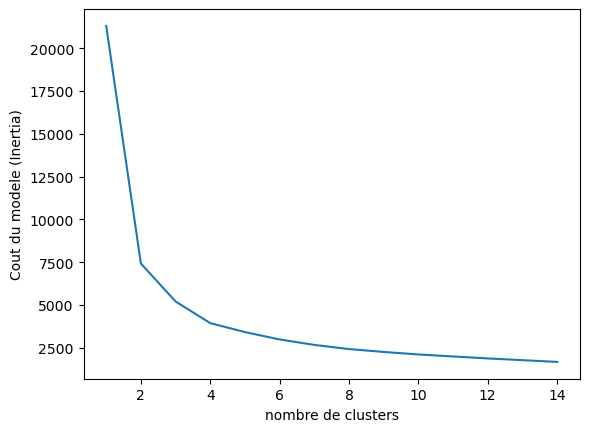

In [ ]:

inertia = []
K_range = range(1, 15)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

# 3.Visualiser les clusters obtenues dans un graphes avec matplotlib

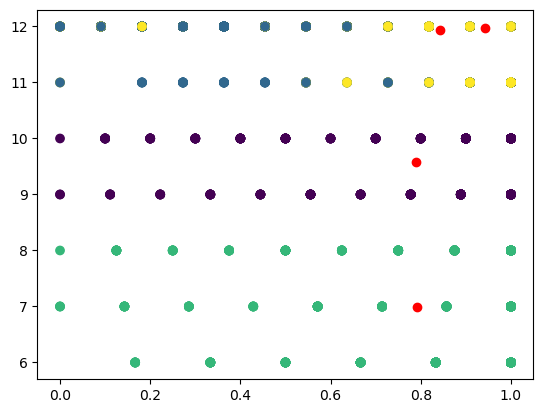

In [ ]:
model = KMeans(n_clusters=4).fit(X)
inertia.append(model.inertia_)
couleurs = model.predict(X)
plt.scatter(X[:,0], X[:,-1], c=couleurs)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,-1], c='r')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


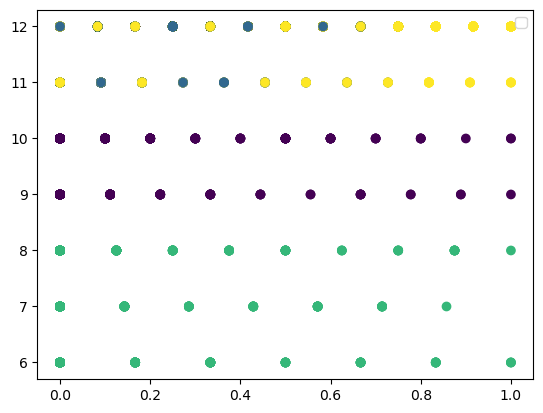

In [ ]:
plt.scatter(X[:,6], X[:,-1], c=couleurs )
plt.legend()


# 5.Refaire la même chose en utilisant l’algorithme fuzzy cmeans « il faut utiliser la bibliothèque skfuzzy »

In [ ]:

!pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 994.0/994.0 kB 313.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=12472f55204a3f412b8f2eec12f317d90ee0296b4edd01eb49a81458367bc17c
  Stored in directory: c:\users\abdou\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fz

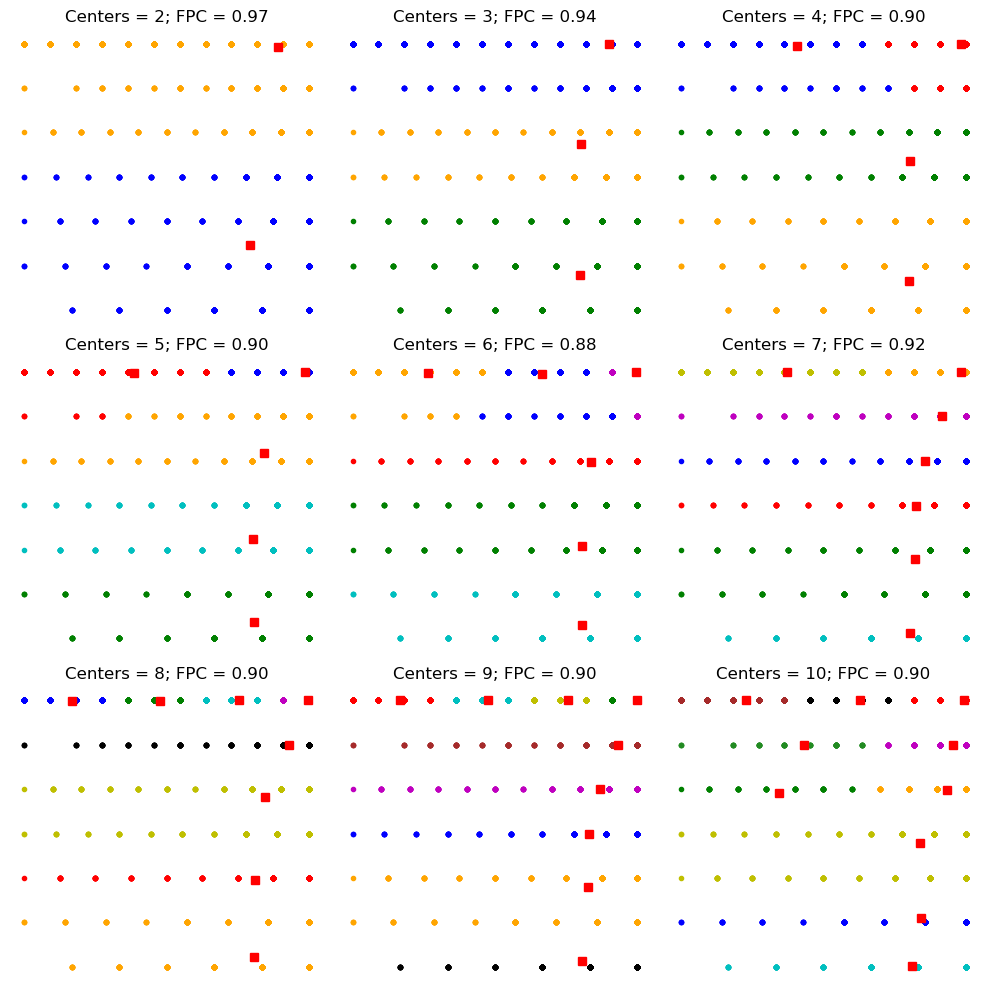

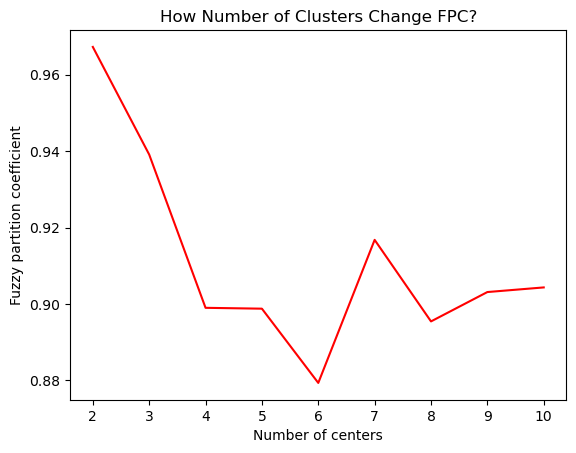

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# Importation du dataset
xpts = X[:, 0]
ypts = X[:, -1]
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
#Pour empiler les points(x,y)
alldata = np.vstack((xpts, ypts))
#Initialisation du tableau des fuzzy clusters
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  cntr, u, u0, d, jm, p,fpc = fz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
  #On ajoute à chaque fois au tableau le fuzzy cluster qu'on a
  fpcs.append(fpc)
  # Pour traces les clusters
  cluster_membership = np.argmax(u, axis=0)
  for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])
    # Pour marquer le centre de chaque cluster
  for pt in cntr:
      ax.plot(pt[0], pt[1], 'rs')
      ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
      ax.axis('off')
# Pour ajuster l'emplacement des axes
fig1.tight_layout()
#Pour dessiner plusieurs tracés sur une seule figure
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='r')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

plt.show()

# 6. Algorithme DBSCAN et Tsne.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbs = DBSCAN(eps=1, min_samples =4)
labels = dbs.fit_predict(X)

In [ ]:
k= np.unique(labels)
len(k)

6

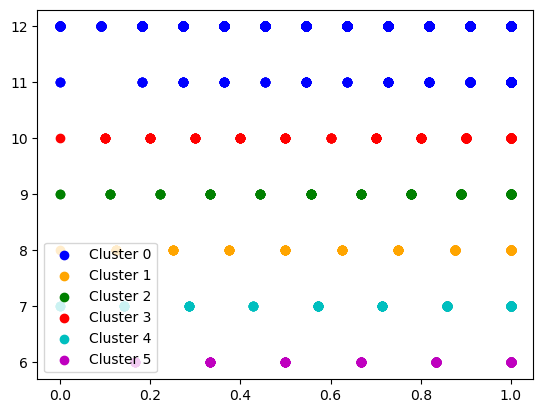

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
for i in k:
  plt.scatter(X[labels==i,0], X[labels==i,-1],c=colors[i], label= "Cluster "+str(i))

plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2,random_state=0)
X_red = tsne.fit_transform(X)

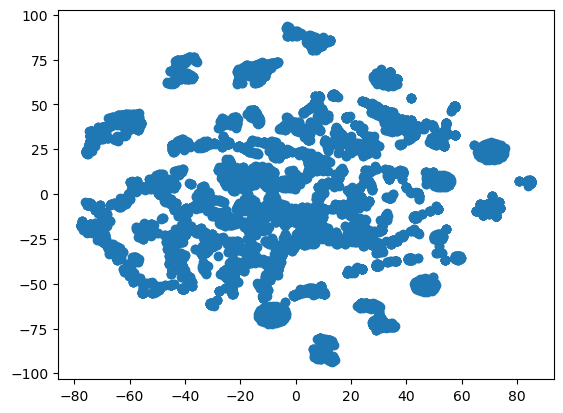

In [ ]:
plt.scatter(X_red[:,0], X_red[:,1])

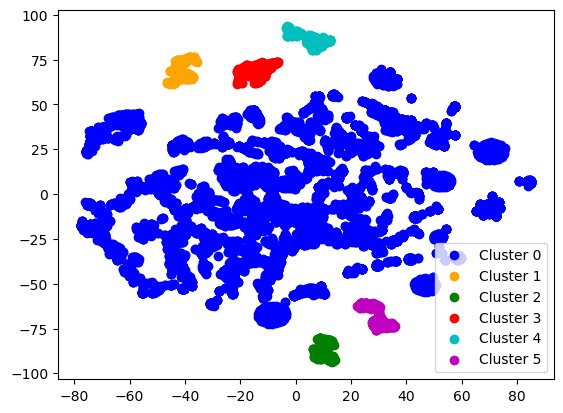

In [ ]:
dbs = DBSCAN(eps=1, min_samples =4)
labels = dbs.fit_predict(X)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
k : np.unique(labels)
for i in k:
  plt.scatter(X_red[labels==i,0], X_red[labels==i,1],c=colors[i], label= "Cluster "+str(i))

plt.legend()
plt.show()

# 7. Comparaison des 4 algorithmes et une conclusion globale sur ces méthodes de clustering et Tsne

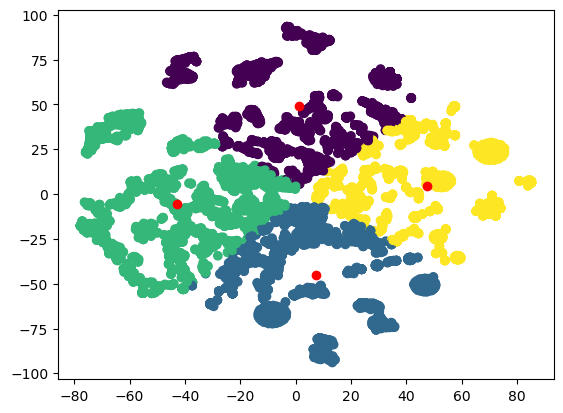

In [ ]:
model = KMeans(n_clusters=4).fit(X_red)
inertia.append(model.inertia_)
couleurs = model.predict(X_red)
plt.scatter(X_red[:,0], X_red[:,1], c=couleurs)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

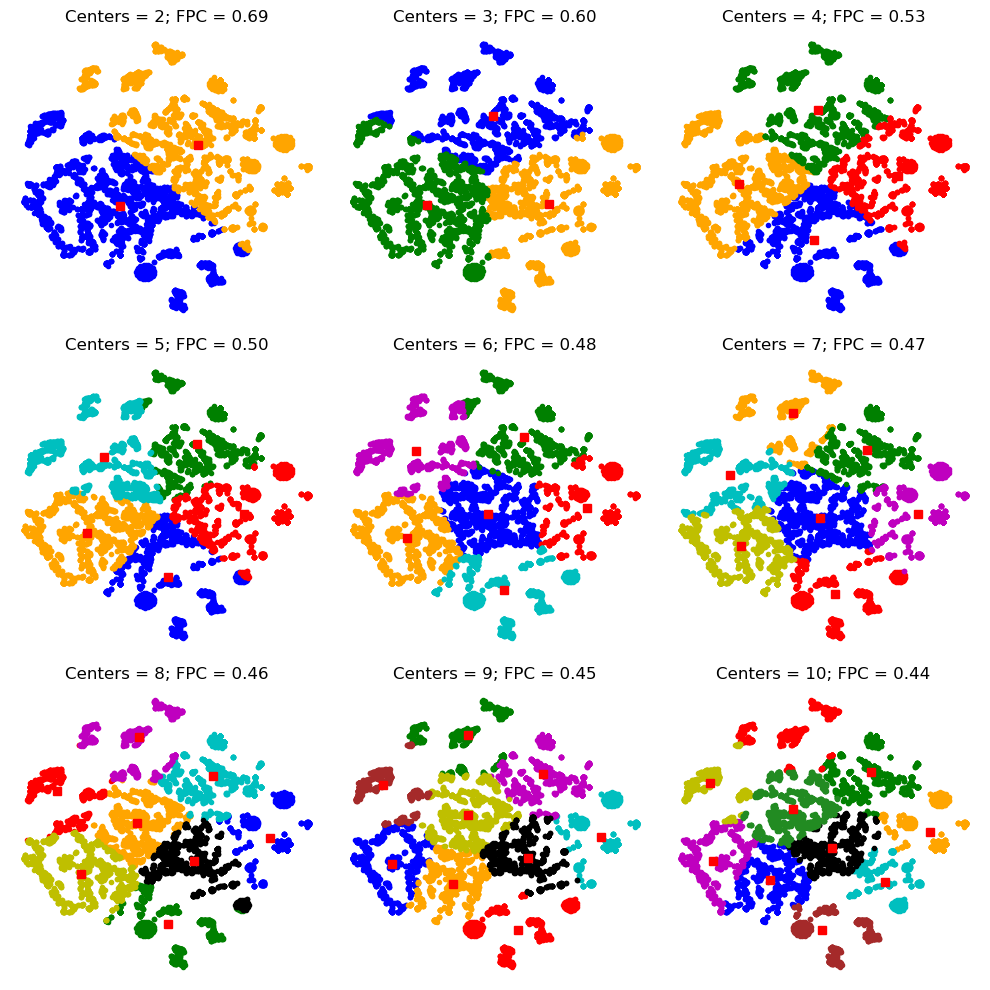

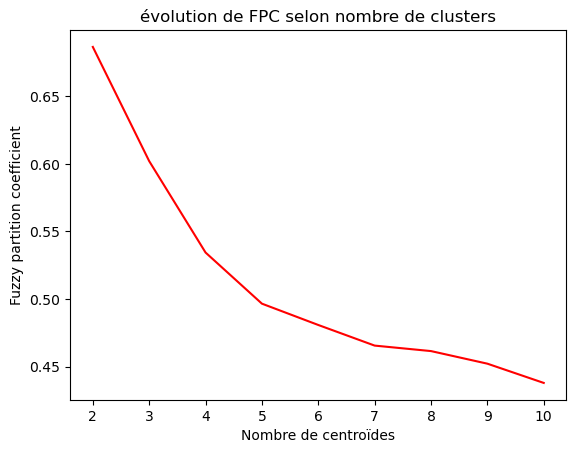

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# Importation du dataset
xpts = X_red[:, 0]
ypts = X_red[:, 1]
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
#Pour empiler les points(x,y)
alldata = np.vstack((xpts, ypts))
#Initialisation du tableau des fuzzy clusters
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  cntr, u, u0, d, jm, p,fpc = fz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
  #On ajoute à chaque fois au tableau le fuzzy cluster qu'on a
  fpcs.append(fpc)
  # Pour traces les clusters
  cluster_membership = np.argmax(u, axis=0)
  for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])
    # Pour marquer le centre de chaque cluster
  for pt in cntr:
      ax.plot(pt[0], pt[1], 'rs')
      ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
      ax.axis('off')
# Pour ajuster l'emplacement des axes
fig1.tight_layout()
#Pour dessiner plusieurs tracés sur une seule figure
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='r')
ax2.set_title("évolution de FPC selon nombre de clusters")
ax2.set_xlabel("Nombre de centroïdes")
ax2.set_ylabel("Fuzzy partition coefficient")

plt.show()



1.   En étudiant les données, KMeans reconnait 4 quatre clusters alors que Fuzzy et DBSCAN en font 6.
2.   En utilsant TSNE, qui nous ramène les données en 2D, la différence entre les algorithmes devient nette( confère fiqures ).
3. Avec KMeans et DBSCAN, un point appartient seulement à un cluster, or avec  FCM il est possible qu’un objet appartienne à deux ou plusieurs clusters selon que les données sont liées à chaque groupe par le biais d’une fonction d’appartenance.

